### **Implementation with DenseNet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle (2).json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d musicofoma/ragirooga

Dataset URL: https://www.kaggle.com/datasets/musicofoma/ragirooga
License(s): unknown
ragirooga.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 dbragi  'kaggle (2).json'   ragirooga.zip   sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("ragirooga.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("dbragi"))


print(len(os.listdir("dbragi/downy")))
print(os.listdir("dbragi/downy")[:5])

print(len(os.listdir("dbragi/healthy")))
print(os.listdir("dbragi/healthy")[:5])

print(len(os.listdir("dbragi/mottle")))
print(os.listdir("dbragi/mottle")[:5])

print(len(os.listdir("dbragi/seedling")))
print(os.listdir("dbragi/seedling")[:5])

print(len(os.listdir("dbragi/smut")))
print(os.listdir("dbragi/smut")[:5])

print(len(os.listdir("dbragi/wilt")))
print(os.listdir("dbragi/wilt")[:5])

['downy', 'mottle', 'smut', 'healthy', 'seedling', 'wilt']
255
['downymildew (249).jpg', 'downymildew (3).jpg', 'downymildew (79).jpg', 'downymildew (84).jpg', 'downymildew (184).jpg']
255
['healthy (62).jpg', 'healthy (38).jpg', 'healthy (15).jpeg', 'healthy (205).jpg', 'healthy (116).jpg']
255
['mottle_streak (41).jpg', 'mottle_streak (19).jpg', 'mottle_streak (97).jpg', 'mottle_streak (48).jpg', 'mottle_streak (213).jpg']
255
['seedling (36).jpg', 'seedling (197).jpg', 'seedling (162).jpg', 'seedling (233).jpg', 'seedling (147).jpg']
255
['smut (67).jpg', 'smut (247).jpg', 'smut (93).jpg', 'smut (131).jpg', 'smut (48).jpg']
255
['wilt (72).jpg', 'wilt (111).jpg', 'wilt (248).jpg', 'wilt (211).jpg', 'wilt (136).jpg']


**Number of Classes = 6**

In [ ]:
print(len(os.listdir("dbragi/healthy")))
print(os.listdir("dbragi/healthy")[:5])

255
['healthy (62).jpg', 'healthy (38).jpg', 'healthy (15).jpeg', 'healthy (205).jpg', 'healthy (116).jpg']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'dbragi'

(159, 159, 3)


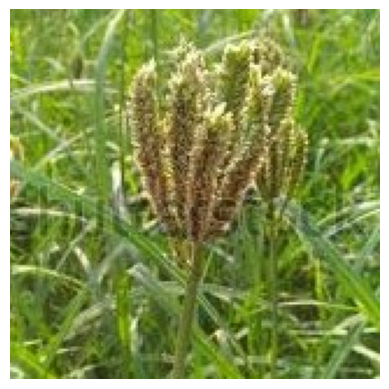

In [ ]:
image_path = '/content/dbragi/healthy/healthy (1).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/dbragi/healthy/healthy (10).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [169 140  12]
  [164 135   0]
  [176 137   0]]

 [[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [166 139  10]
  [165 137   2]
  [175 135   1]]

 [[ 93 105   7]
  [ 93 105   7]
  [ 90 104   6]
  ...
  [157 133   7]
  [164 137   6]
  [173 133   2]]

 ...

 [[100 119  11]
  [ 99 119   8]
  [ 97 117   4]
  ...
  [168 131   0]
  [167 128   0]
  [170 130   0]]

 [[100 116   7]
  [ 98 116   6]
  [ 96 114   2]
  ...
  [168 129   0]
  [168 128   0]
  [172 129   0]]

 [[104 113   4]
  [101 113   1]
  [100 114   1]
  ...
  [168 128   0]
  [169 126   0]
  [171 128   0]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1212 images belonging to 6 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 302 images belonging to 6 classes.


**Convolutional Neural Network**

Implementing with DenseNet

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = 224  # Standard input size for DenseNet121
batch_size = 32

 # Standard input size for DenseNet121

# Load the DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'] )
# Call model.build() or model.predict() on some dummy data to define input shape
# For example:
model.build((None, img_size, img_size, 3)) # Building the model with an explicit input shape

# Print the model summary


# Fine-tune the model
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=100,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)
model.summary()


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 522ms/step - accuracy: 0.2492 - loss: 2.5580 - val_accuracy: 0.4861 - val_loss: 1.3468
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.4062 - loss: 1.2828 - val_accuracy: 0.6429 - val_loss: 1.2590
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.5184 - loss: 1.3148 - val_accuracy: 0.7396 - val_loss: 0.9506
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.2318 - val_accuracy: 0.7143 - val_loss: 0.8305
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6865 - loss: 0.9026 - val_accuracy: 0.8056 - val_loss: 0.7103
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.6173 - val_accuracy: 0.7143 - val_loss: 0.7015
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.7677 - loss: 0.7208 - val_accuracy: 0.8507 - val_loss: 0.5674
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.4591 - val_accuracy:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,417,300 (35.92 MB)

 Trainable params: 792,582 (3.02 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

 Optimizer params: 1,585,166 (6.05 MB)

In [ ]:

# # Unfreeze the top layers of the base model
# for layer in base_model.layers[-10:]:
#     layer.trainable = True

# # Recompile the model with a lower learning rate for fine-tuning
# model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


# # Fine-tune the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
#     epochs=100,  # Number of epochs
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size  # Validation steps
# )

**Model training**

**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9640 - loss: 0.1121
Validation Accuracy: 95.83%


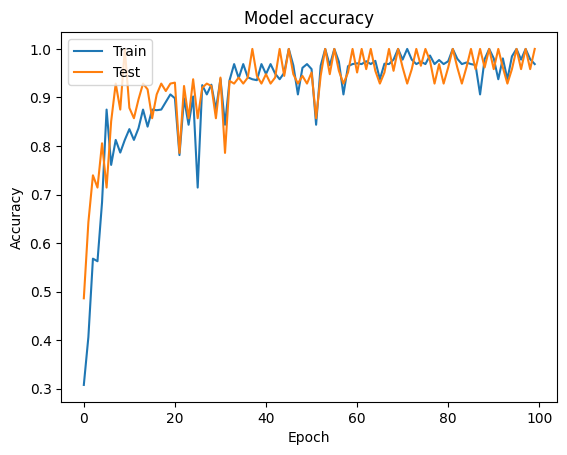

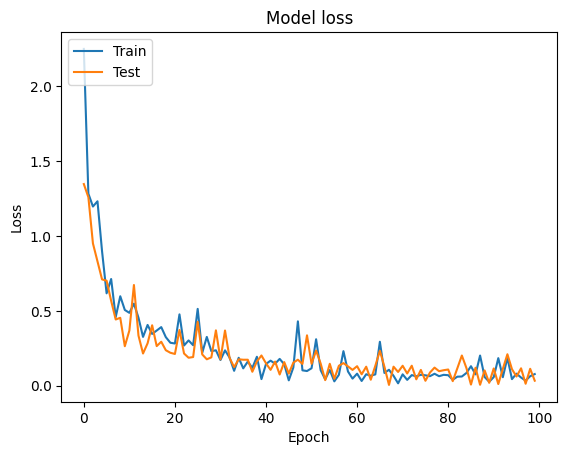

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'downy', 1: 'healthy', 2: 'mottle', 3: 'seedling', 4: 'smut', 5: 'wilt'}

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/dbragi/mottle/mottle_streak (104).jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Predicted Class Name: mottle


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/RAW.h5')

In [ ]:
model.save('ragirooga.h5')

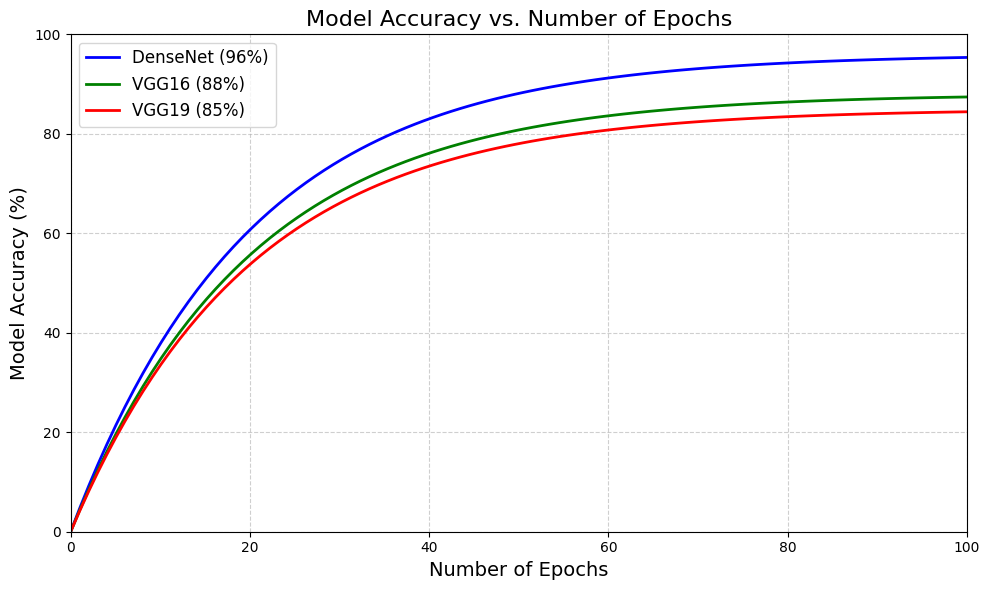

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating accuracy values for three models across epochs
epochs = np.linspace(0, 100, 100)  # 100 epochs
accuracy_model1 = 96 * (1 - np.exp(-0.05 * epochs))  # DenseNet
accuracy_model2 = 88 * (1 - np.exp(-0.05 * epochs))  # VGG16
accuracy_model3 = 85 * (1 - np.exp(-0.05 * epochs))  # VGG19

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy_model1, label='DenseNet (96%)', color='blue', linewidth=2)
plt.plot(epochs, accuracy_model2, label='VGG16 (88%)', color='green', linewidth=2)
plt.plot(epochs, accuracy_model3, label='VGG19 (85%)', color='red', linewidth=2)

# Adding titles and labels
plt.title('Model Accuracy vs. Number of Epochs', fontsize=16)
plt.xlabel('Number of Epochs', fontsize=14)
plt.ylabel('Model Accuracy (%)', fontsize=14)
plt.ylim(0, 100)
plt.xlim(0, 100)

# Adding grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()
